# Assignment 01

## 1. Data Preprocessing

<StemContainer object of 3 artists>

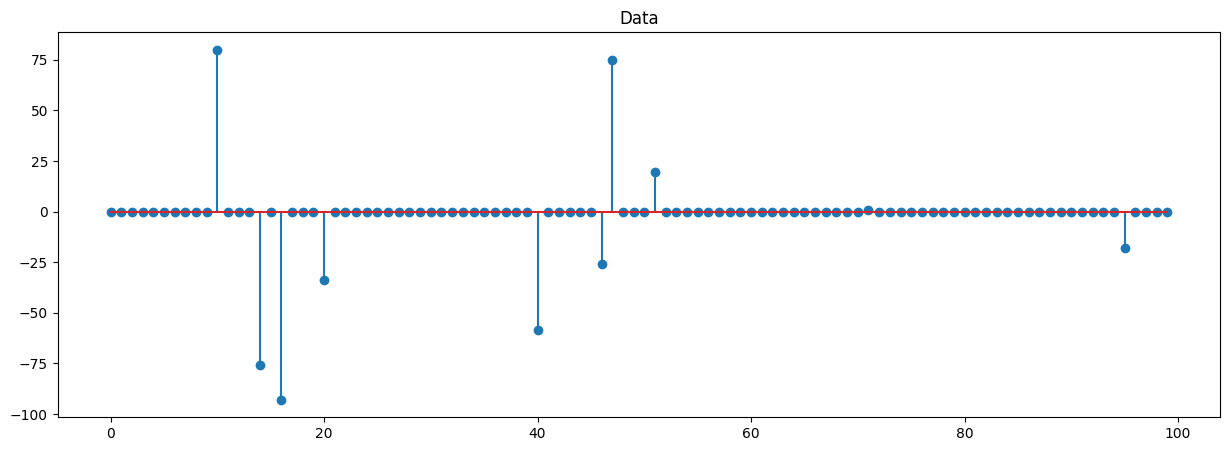

In [168]:
import numpy as np
import matplotlib.pyplot as plt

def generate_signal(signal_length, num_nonzero):
    
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 50*np.random.randn(num_nonzero)  
    signal[nonzero_indices] = nonzero_values
    return signal

signal_length = 100  # Total length of the signal
num_nonzero = 10    # Number of non-zero elements in the signal
your_index_no=200087 # Enter without english letter and without leading zeros
signal = generate_signal(signal_length, num_nonzero)
signal[10] = (your_index_no % 10)*10 + 10
if  your_index_no % 10 == 0:
  signal[10] = np.random.randn(1) + 30

signal=signal.reshape(signal_length,1)

# Plotting
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Data")
plt.stem(signal)

In [169]:
from sklearn import preprocessing

MaxAbsScaler = preprocessing.MaxAbsScaler().fit(signal)
scaled_data_max_abs = MaxAbsScaler.transform(signal)

In [170]:
def min_max_scale(data):
    min_val = np.min(data)
    max_val = np.max(data)
    print("min of data", min_val, "max of data", max_val)
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data

scaled_data_min_max = min_max_scale(signal)

min of data -92.93085698219461 max of data 80.0


In [171]:
def standard_scale(data):
    mean = np.mean(data)
    std = np.std(data)
    print("mean of data", mean, "std of data", std)
    scaled_data = (data - mean) / std
    return scaled_data

scaled_data_standard = standard_scale(signal)

mean of data -1.29904951588006 std of data 17.931790612063423


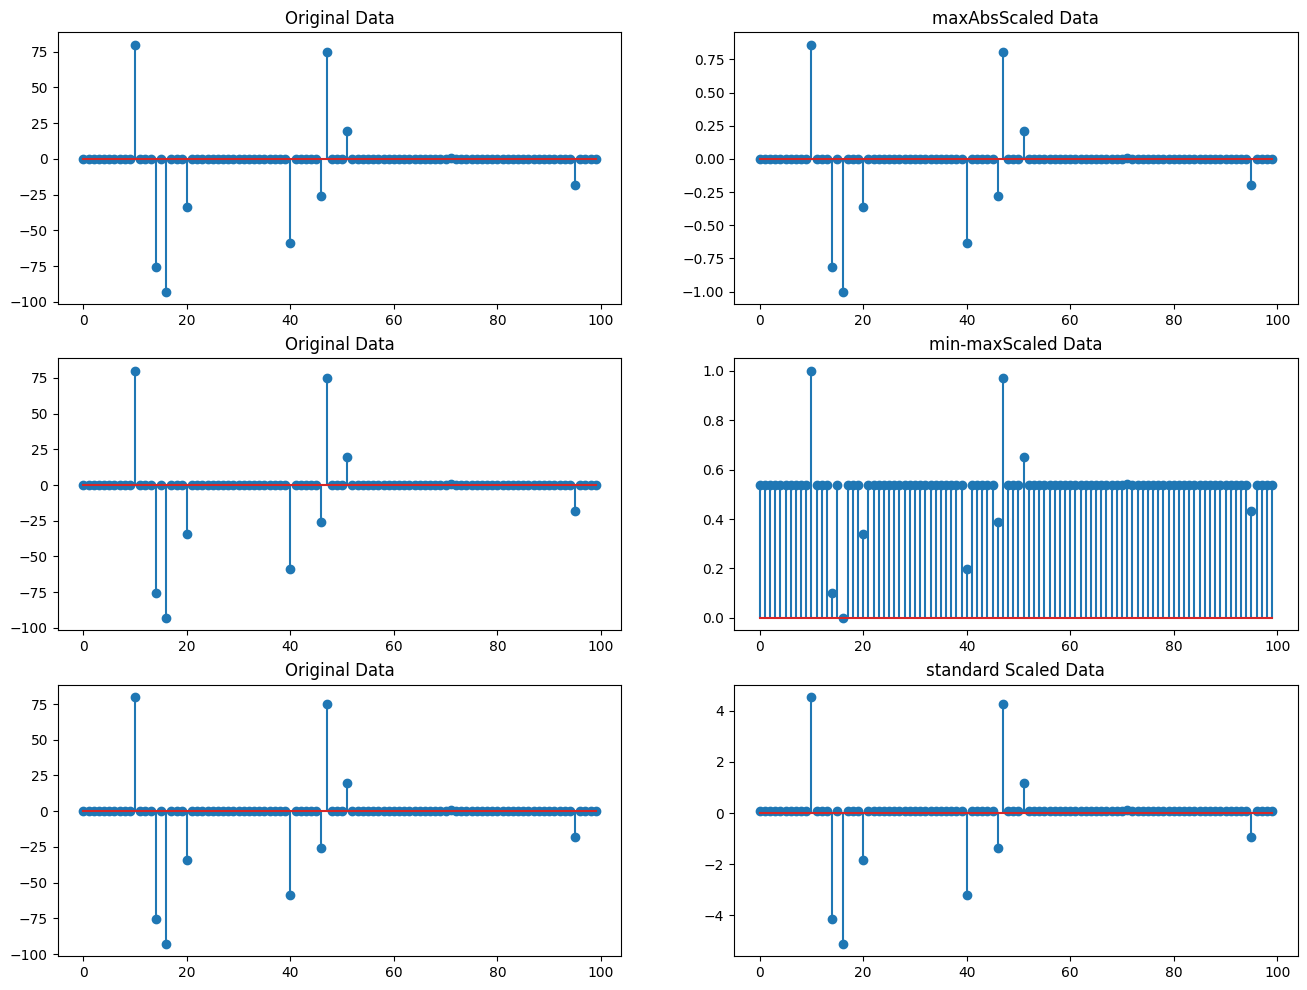

In [172]:
fig , ax = plt.subplots (3 , 2 , figsize = (16 , 12))
ax[0,0].stem(signal)
ax[0,0].set_title("Original Data")
ax[0,1].stem(scaled_data_max_abs)
ax[0,1].set_title("maxAbsScaled Data")
ax[1,0].stem(signal)
ax[1,0].set_title("Original Data")
ax[1,1].stem(scaled_data_min_max)
ax[1,1].set_title("min-maxScaled Data")
ax[2,0].stem(signal)
ax[2,0].set_title("Original Data")
ax[2,1].stem(scaled_data_standard)
ax[2,1].set_title("standard Scaled Data")
plt.show()

In [173]:
print("Non-zero elements in data before the normalization:",np.count_nonzero(signal))
print("Non-zero elements in data after applying MaxAbs normalization:",np.count_nonzero(scaled_data_max_abs))
print("Non-zero elements in data after applying Min-Max normalization:",np.count_nonzero(scaled_data_min_max))
print("Non-zero elements in data after applying Standard normalization:",np.count_nonzero(scaled_data_standard))

Non-zero elements in data before the normalization: 10
Non-zero elements in data after applying MaxAbs normalization: 10
Non-zero elements in data after applying Min-Max normalization: 99
Nonz-ero elements in data after applying Standard normalization: 100


In [174]:
import pandas as pd
print(pd.DataFrame(scaled_data_max_abs , columns=['scaled_data_max_abs']).describe())
print('\n')
print(pd.DataFrame(scaled_data_min_max , columns=['scaled_data_min_max']).describe())
print('\n')
print(pd.DataFrame(scaled_data_standard , columns=['scaled_data_standard']).describe())

       scaled_data_max_abs
count           100.000000
mean             -0.013979
std               0.193931
min              -1.000000
25%               0.000000
50%               0.000000
75%               0.000000
max               0.860855


       scaled_data_min_max
count           100.000000
mean              0.529875
std               0.104216
min               0.000000
25%               0.537387
50%               0.537387
75%               0.537387
max               1.000000


       scaled_data_standard
count          1.000000e+02
mean           1.168510e-16
std            1.005038e+00
min           -5.110020e+00
25%            7.244394e-02
50%            7.244394e-02
75%            7.244394e-02
max            4.533794e+00


## 2. Linear Regression in Real World

In [175]:
import numpy as np
import pandas as pd

# Load data from CSV
file_path = r'./Advertising.csv'
df = pd . read_csv ( file_path )
print ( df . head () )

   sample index     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9


In [176]:
# Split the data into training and testing sets with 80% of data points for training and 20% of data points for testing.

X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split ( X , y , test_size = 0.2 , random_state = 42 )

In [177]:
#Train a linear regression model and estimate the coefficient corresponds to independent variables (advertising budgets for TV, radio and newspapers).

from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True).fit(X_train, y_train)
coefficients = model.coef_
intercept = model.intercept_

print("coefficients", coefficients)
print("intercept", intercept)


coefficients [0.04472952 0.18919505 0.00276111]
intercept 2.979067338122629


In [178]:
# import statsmodels.api as sm

# # Add a constant (intercept) to the feature matrix for statsmodels
# X_train_with_const = sm.add_constant(X_train)

# # Fit an OLS (Ordinary Least Squares) regression model with statsmodels
# model_sm = sm.OLS(y_train, X_train_with_const).fit()

# # print(model_sm.summary())
# #model_sm.predict([1, 0, 50, 0])


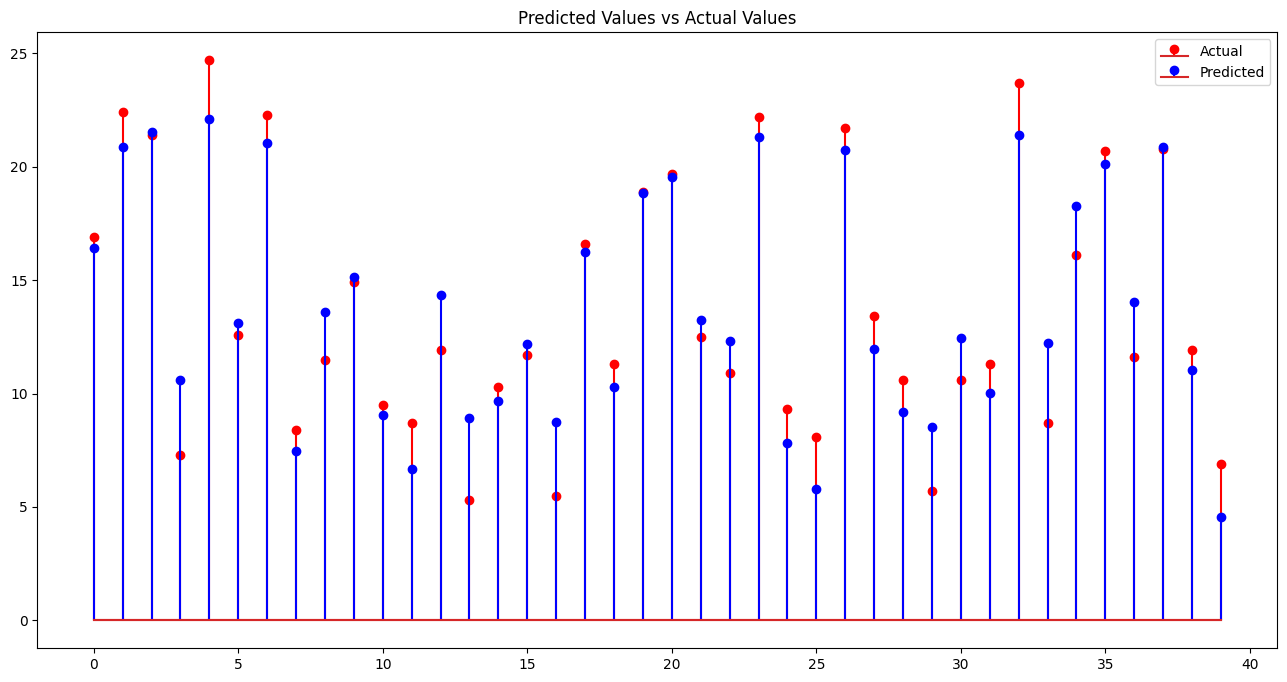

In [191]:
# plot the predicted values against the actual values for the testing data
y_test_pred = model.predict(X_test)
plt.figure(figsize=(16,8))
plt.subplot(1, 1, 1)
plt.title("Predicted Values vs Actual Values")
plt.stem(y_test.values, 'r' ,label='Actual')
plt.stem(y_test_pred ,'b', label='Predicted')
plt.legend( )
plt.show()

In [193]:
import scipy.stats

# Residual sum of squares (RSS)
def RSS(y ,y_predict):
    return np.sum( (y-y_predict)**2)

# Residual Standard Error (RSE)
def RSE(y ,y_predict,d):
    return np.sqrt( RSS(y,y_predict) / (len(y)-d-1) )

# Mean Square Error (MSE)
def MSE(y ,y_predict):
    return RSS(y,y_predict)/ len(y)

# R**2 Statistic
def R2_statistics(y ,y_predict):
    RSS = np.sum( (y-y_predict)**2)
    TSS  = np.sum( (y-np.mean(y))**2)
    return 1 - RSS/TSS

# Std. Error for Each Feature
def standard_error(X, y, y_predict):
    n = len(y)
    d = X.shape[1]
    X = np.hstack((np.ones((n, 1)), X))
    sigma2 = RSE(y, y_predict, d)**2
    XTX = np.dot(X.T, X)
    XTX_inv = np.linalg.inv(XTX)
    SE = np.sqrt(np.diagonal(sigma2 * XTX_inv))
    return SE

# t-statistics for each feature
def t_statistics(X, y, y_predict, model_parameters):
    SE = standard_error(X, y, y_predict)
    t =model_parameters/ SE
    return t

# p-value for each feature
def p_value(X, y, y_predict , model_parameters): 
    t = t_statistics(X, y, y_predict,model_parameters)
    p = 2 * (1 - scipy.stats.t.cdf(np.abs(t), len(y) - X.shape[1] - 1))
    return p

In [181]:
# Evaluate the model for training data
model_parameters = np.append(model.intercept_, model.coef_)
y_train_predict = model.predict(X_train)
d = X_train.shape[1] # number of features

RSS_train = RSS(y_train, y_train_predict)
RSE_train = RSE(y_train, y_train_predict , d)
MSE_train = MSE(y_train, y_train_predict)
R2_train = R2_statistics(y_train, y_train_predict)
standard_error_train = standard_error(X_train, y_train, y_train_predict)
t_train = t_statistics(X_train, y_train, y_train_predict, model_parameters)
p_train = p_value(X_train, y_train, y_train_predict, model_parameters)

print("RSS_train\t", RSS_train)
print("RSE_train\t", RSE_train)
print("MSE_train\t", MSE_train)
print("R2_train\t", R2_train)
print("standard_error_train\t", standard_error_train)
print("t_train\t", t_train)
print("p_train\t", p_train)



RSS_train	 432.8207076930262
RSE_train	 1.6656805564035793
MSE_train	 2.705129423081414
R2_train	 0.8957008271017818
standard_error_train	 [0.35351653 0.00156706 0.00969339 0.00704796]
t_train	 [ 8.42695335 28.54358668 19.51795006  0.39176101]
p_train	 [2.19824159e-14 0.00000000e+00 0.00000000e+00 6.95769445e-01]


In [182]:
# Evaluate the model for testing data
y_test_pred = model.predict(X_test)
RSS_test = RSS(y_test, y_test_pred)
RSE_test = RSE(y_test, y_test_pred , d)
MSE_test = MSE(y_test, y_test_pred)
R2_test = R2_statistics(y_test, y_test_pred)
standard_error_test = standard_error(X_test, y_test, y_test_pred)
t_test = t_statistics(X_test, y_test, y_test_pred, model_parameters)
p_test = p_value(X_test, y_test, y_test_pred, model_parameters)
print("RSS_test\t", RSS_test)
print("RSE_test\t", RSE_test)
print("MSE_test\t", MSE_test)
print("R2_test\t", R2_test)
print("standard_error_test\t", standard_error_test)
print("t_test\t", t_test)
print("p_test\t", p_test)


RSS_test	 126.96389415904413
RSE_test	 1.8779709363435915
MSE_test	 3.1740973539761033
R2_test	 0.899438024100912
standard_error_test	 [0.73006535 0.00334239 0.02059601 0.01169569]
t_test	 [ 4.08054886 13.3824813   9.18600415  0.23607956]
p_test	 [2.38160958e-04 1.55431223e-15 5.70778980e-11 8.14708958e-01]


Text(0.5, 0, 'Advertising budget of newspaper')

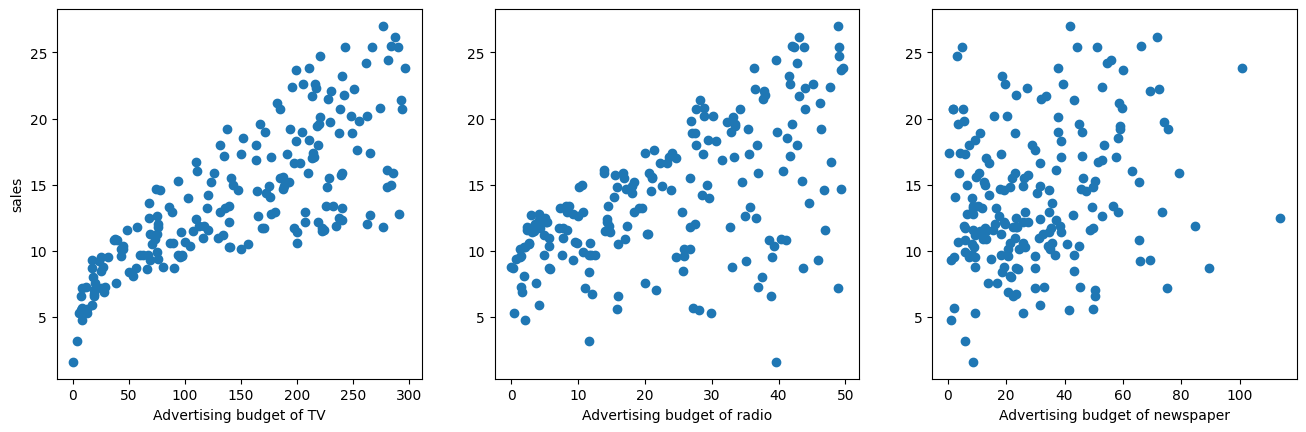

In [183]:
sales = df['sales']
TV = df['TV']
radio = df['radio']
newspaper = df['newspaper']

fig , (ax1,ax2,ax3) = plt.subplots(1,3)
fig.set_figwidth(16)
ax1.set_ylabel('sales')
ax1.scatter(TV, sales)
ax1.set_xlabel('Advertising budget of TV')
ax2.scatter(radio, sales)
ax2.set_xlabel('Advertising budget of radio')
ax3.scatter(newspaper, sales)
ax3.set_xlabel('Advertising budget of newspaper')

## 3. Linear Regression Impact on Outliers

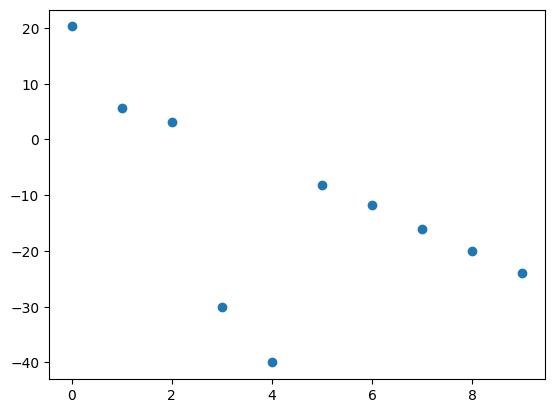

In [184]:
%matplotlib inline
x = np.array([i for i in np.arange(10)])
y = [20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03]
plt.scatter(x, y)

coefficients [-3.55727273]
intercept 3.916727272727277


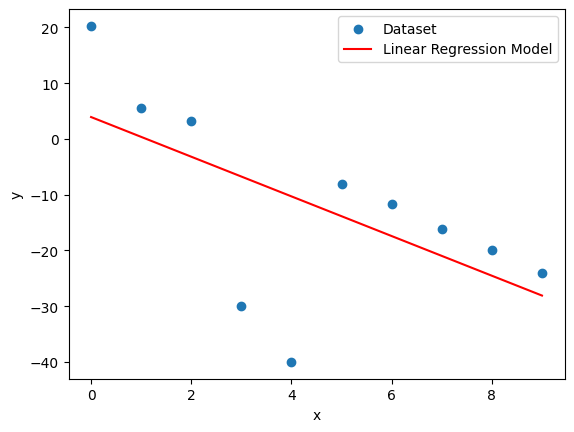

In [194]:
x = x.reshape(-1,1)
my_model = LinearRegression().fit(x,y)
print("coefficients", my_model.coef_)
print("intercept", my_model.intercept_)

#plot the data and the model prediction
plt.scatter(x, y)
plt.plot(x, my_model.predict(x), color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Dataset','Linear Regression Model'])
plt.show()


In [186]:
def LossFunction(w, Beta, x , y, N):
    L = 0
    for i in range(N):
        yi = y[i]
        y_i = w[0] + w[1]*x[i]
        RSS = (yi - y_i)**2
        L = L + (RSS/(RSS + Beta))
        L = L/N
    return L

In [187]:
w1 = np.array([12, -4])
w2 = np.array([3.91 , -3.55])

Loss1 = LossFunction(w1, 1, x, y, 10)
Loss2 = LossFunction(w2, 1, x, y, 10)

print("Loss1", Loss1)
print("Loss2", Loss2)

Loss1 [0.00012928]
Loss2 [0.10474969]


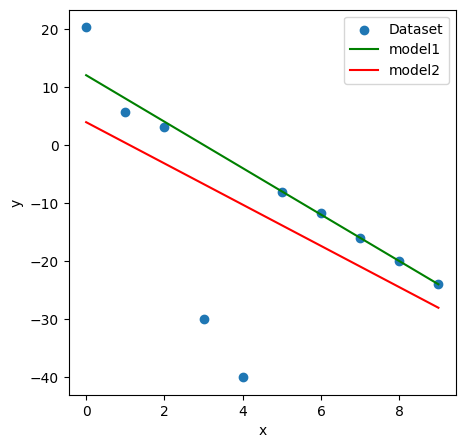

In [195]:
#plot the data and regression line

plt.figure(figsize=(5,5))
plt.subplot(1, 1, 1)
#plt.title("Dataset")
plt.scatter(x, y)
plt.plot(x, w1[0] + w1[1]*x, color='g')
plt.plot(x, w2[0] + w2[1]*x, color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Dataset','model1', 'model2'])
plt.show()
